In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flipkart-product-list/flipkart_products_20250405.csv


LOAD THE DATA SET

In [3]:
df = pd.read_csv("/kaggle/input/flipkart-product-list/flipkart_products_20250405.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product Name      5000 non-null   object 
 1   Price (₹)         5000 non-null   float64
 2   Rating (★)        5000 non-null   float64
 3   Number of Buyers  5000 non-null   int64  
 4   Total Sold        5000 non-null   int64  
 5   Available Stock   5000 non-null   int64  
 6   Main Category     5000 non-null   object 
 7   Sub Category      5000 non-null   object 
 8   Discount (%)      5000 non-null   int64  
 9   Seller            5000 non-null   object 
 10  Return Policy     5000 non-null   bool   
 11  Product URL       5000 non-null   object 
dtypes: bool(1), float64(2), int64(4), object(5)
memory usage: 434.7+ KB


# Data Cleaning and preprocessing

converting price and discount columns to numeric

In [6]:
df['Price (₹)'] = df['Price (₹)'].replace('[\(₹)]','',regex = True).astype(float)
df['Discount (%)'] = df['Discount (%)'].replace('[\(%)]','',regex = True).astype(float)


Filling the missing values

In [7]:
df.fillna({
   'Rating (★)' : df['Rating (★)'].mean(),
    ' Number of Buyer' : 0,
    'Total Sold' : 0,
    'Available Stock' : 0,
    'Discount (%)' : 0
}, inplace = True)

# Checking the stats of Data

In [8]:
df.describe()

,Price (₹),Rating (★),Number of Buyers,Total Sold,Available Stock,Discount (%)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,35884.094350,4.003640,5044.425600,5005.066200,1250.870200,26.208000
std,39867.681428,0.584742,2886.016013,2897.042048,1109.872427,23.484332
min,100.450000,3.000000,11.000000,50.000000,0.000000,0.000000
25%,12275.502500,3.500000,2553.750000,2495.000000,323.750000,0.000000
50%,27761.010000,4.000000,5099.500000,4972.500000,916.000000,23.000000
75%,42852.247500,4.500000,7575.500000,7571.500000,1934.250000,47.000000
max,249158.910000,5.000000,10000.000000,10000.000000,4924.000000,70.000000


# Data Visualisations

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


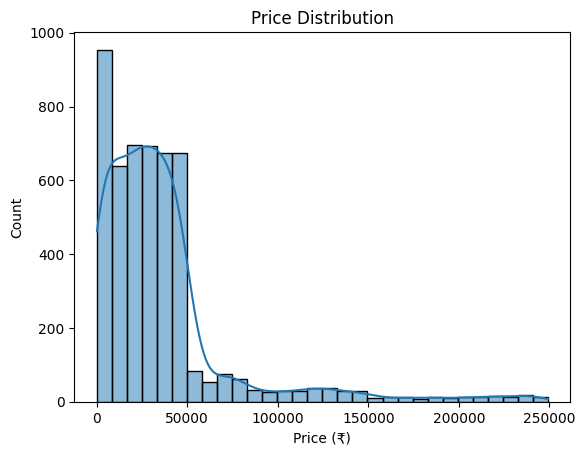

In [11]:
sns.histplot(df['Price (₹)'], kde = True , bins = 30)
plt.title('Price Distribution')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


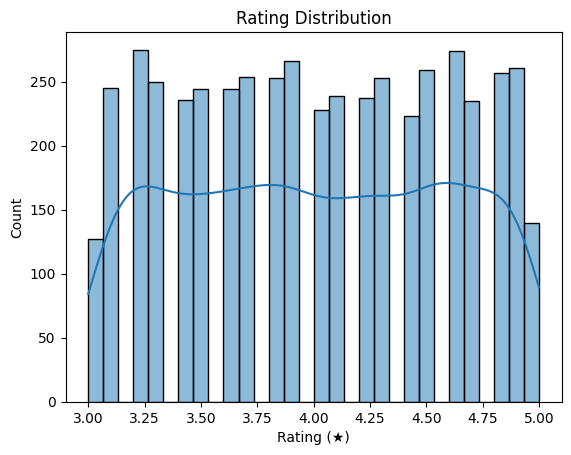

In [12]:
sns.histplot(df['Rating (★)'], kde = True , bins = 30)
plt.title('Rating Distribution')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


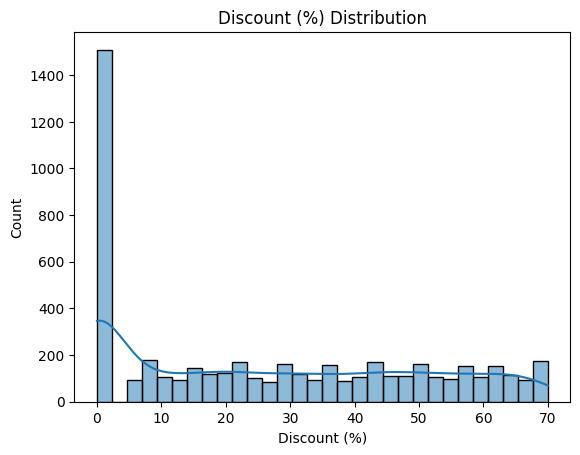

In [13]:
sns.histplot(df['Discount (%)'], kde = True , bins = 30)
plt.title('Discount (%) Distribution')
plt.show()

# Analysing Trends

# Top 10 Products by Sales and Rating

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product Name      5000 non-null   object 
 1   Price (₹)         5000 non-null   float64
 2   Rating (★)        5000 non-null   float64
 3   Number of Buyers  5000 non-null   int64  
 4   Total Sold        5000 non-null   int64  
 5   Available Stock   5000 non-null   int64  
 6   Main Category     5000 non-null   object 
 7   Sub Category      5000 non-null   object 
 8   Discount (%)      5000 non-null   float64
 9   Seller            5000 non-null   object 
 10  Return Policy     5000 non-null   bool   
 11  Product URL       5000 non-null   object 
dtypes: bool(1), float64(3), int64(3), object(5)
memory usage: 434.7+ KB


**Top 10 products ny ratings**

In [16]:
top_10_rate = df.nlargest(10,'Rating (★)')[['Product Name','Rating (★)','Total Sold']]
print("Top 10 products ny ratings \n",top_10_rate)

Top 10 products ny ratings 
                                           Product Name  Rating (★)  Total Sold
2                     Choudhury LLC Amet Plus Decor 15         5.0        2580
41                      Patla-Swamy Quos Plus Decor 13         5.0        5651
69     Tella, Dayal and Tak Totam Ultra Kitchenware 14         5.0         635
174           Memon Inc Mollitia Lite Refrigerators 14         5.0        5261
201  Pandya, Mukhopadhyay and Baria Quibusdam Pro M...         5.0        2729
208       Lata and Sons Repellendus Lite Headphones 11         5.0        9781
225           Kothari-Borah Consequuntur Plus Decor 15         5.0        8508
231    Devan, Buch and Ghosh Eligendi Pro Headphones 3         5.0        6691
245             Yohannan-Mahajan Mollitia Lite Decor 4         5.0        6735
308         Hayre, Sagar and Sahni Libero Lite Jeans 2         5.0        1145


In [17]:
top_10_dis = df.nlargest(10,'Discount (%)')[['Product Name','Discount (%)','Total Sold']]
print("Top 10 products ny Discount \n",top_10_dis)

Top 10 products ny Discount 
                                           Product Name  Discount (%)  \
23           Dara, Oommen and Golla Neque Lite Decor 4          70.0   
25                   Pathak-Balay Tempore Plus Shoes 4          70.0   
388                Rattan-Das Atque Ultra Microwaves 9          70.0   
498                  Sha PLC Debitis Plus Headphones 7          70.0   
589  Srivastava, Sha and Dara Suscipit Ultra Refrig...          70.0   
688  Mohan, Chakraborty and Dubey Earum Lite T-Shir...          70.0   
729       Kale-Hegde Repudiandae Lite Refrigerators 13          70.0   
775   Sarna-Parmer Laudantium Lite Washing Machines 11          70.0   
787                 Palan-Anne Consequatur Pro Shoes 8          70.0   
993                   Kaul-Mannan Cum Plus T-Shirts 12          70.0   

     Total Sold  
23         4485  
25          850  
388        1350  
498        7667  
589        6629  
688        8499  
729        2398  
775        5005  
787        6265

# Category Wise Analysis

In [18]:
category_analysis = df.groupby('Main Category').agg({
    'Price (₹)' : 'mean',
    'Rating (★)' : 'mean',
    'Discount (%)' : 'mean'
}). reset_index()
print('Category Wise Analysis'category_analysis)

  Main Category     Price (₹)  Rating (★)  Discount (%)
0    Appliances  30524.578226    4.016706     27.077593
1   Electronics  68221.054290    3.976863     25.869804
2       Fashion  18900.433406    4.019451     26.602906
3          Home  24912.876729    4.002044     25.262469


# Seller Wise Analysis

In [19]:
seller_analysis = df.groupby('Seller').agg({
    'Total Sold' : 'sum',
    'Rating (★)' : 'mean'
}). reset_index()
print("Seller Wise Analysis",seller_analysis)

Seller Wise Analysis                Seller  Total Sold  Rating (★)
0     Cloudtail India     3278131    3.969207
1        ElectroWorld     3283397    4.008062
2         FashionPlus     3065639    3.956837
3    Flipkart Assured     2873379    3.985042
4  HomeCare Solutions     3025559    4.070147
5           MobileHub     3157430    4.061094
6           RetailNet     3397963    4.000000
7         SuperComNet     2943833    3.976174


# Return Ploicy Impact On Sales And Rating

In [20]:
return_analysis = df.groupby('Return Policy').agg({
    'Total Sold' : 'sum',
    'Rating (★)' : 'mean'
}). reset_index()
print("Return Policy Analysis",return_analysis)

Return Policy Analysis    Return Policy  Total Sold  Rating (★)
0          False    12369417    4.001273
1           True    12655914    4.005889


# Summary


**Project Summary¶Objective: 
This Python script is designed to analyze a dataset of Flipkart products, performing various statistical and visual analyses to derive insights and provide recommendations.
Key Functions:
Data Loading and Cleaning:
The dataset is loaded from a CSV file.Price and discount columns are converted to numeric values by removing non-numeric characters.Missing values are filled with appropriate default values (e.g., mean rating, zero for numerical columns).
Summary Statistics:
Basic statistical summaries of the dataset are generated to understand the central tendencies and dispersion of the data.
Distribution Plots:
Histograms are created to visualize the distribution of prices, ratings, and discounts.
Correlation Analysis:A correlation matrix is computed and visualized to identify relationships between different numerical variables in the dataset.
Top Products Analysis:
The top 10 products are identified based on ratings and total sales.

Category-wise Analysis:Average price, rating, and discount are calculated for each main category.

Seller-wise Analysis:Total sales and average ratings are aggregated for each seller.

Usage:

Marketing and Sales Strategies: Develop marketing strategies based on category and seller performance.

Pricing and Discount Policies: Optimize pricing and discount strategies to enhance sales.

Customer Satisfaction: Evaluate the impact of return policies on customer satisfaction and sales.

Data Analysis and Reporting: Analyze product performance and sales trends for better decision-making.**
